# <span style='color:#547dcd'> Neural networks  </span> 

## <span style='color:#547dcd'> The original perceptron  </span> 

The aim is binary classification. Assume that output is $\{ 0 = \text{do not invest} \}$ versus $\{ 1 = \text{invest} \}$.


The perceptron can be defined as an activated linear mapping:
$$
f(\mathbf{x}) = \begin{cases} 1, & \mathbf{x}'\mathbf{w} + b > 0 \\0 , & \text{otherwise} \end{cases}
$$

- Weights ($\mathbf{x}$): These scale the variable.
- Biases ($b$): These shift the decision barrier. 
- Error: Given $b$ and $w_i$ the error is $\epsilon_i = y_i - 1_{\{ \sum_{j=1}^{J} x_{i,j} w_j + w_0 > 0 \}}$. 
    - It can be custom to set $b = w_0$ and have an initial constant column to $x$: $x_{i,0} = 1$, so that errors become $\epsilon_i = y_i - 1_{\{ \sum_{j=0}^{J} x_{i,j} w_j > 0 \}}$

Perceptrons do not have closed form solution $\to$ can only be approximated. 

A good way to derive weights is to minimize sum of squared errors. The simplest way to proceed is 

1. compute the current model value at point $\mathbf{x}$: $\tilde{y}_i = 1_{\{ \sum_{j=0}^{J} x_{i,j} w_j > 0 \}}$,
2. adjust the weight vector: $w_j \leftarrow w_j + \eta (y_i - \tilde{y}_i) x_{i,j}$,

This amounts to shifting the weights in the direction that minimizes the squares error. 

$\eta$ is the learning rate. Large $\eta$ implies large shifts: learning is rapid but convergence might be slow or not occur. *A small $\eta$ is preferred as this avoids overfitting*.

## <span style='color:#547dcd'> Multilayer perceptron  </span> 

### <span style='color:#547dcd'> Introduction and notation  </span> 

A perceptron can be viewed as a linear model that is applied to a particular function: **Heaviside (step) function**. These functions are generally called **activation functions** and they introduce non-linearity into otherwise linear systems. Below is an illustration of multilayer perceptrons (in blue; slightly different notation in picture compared to notes).

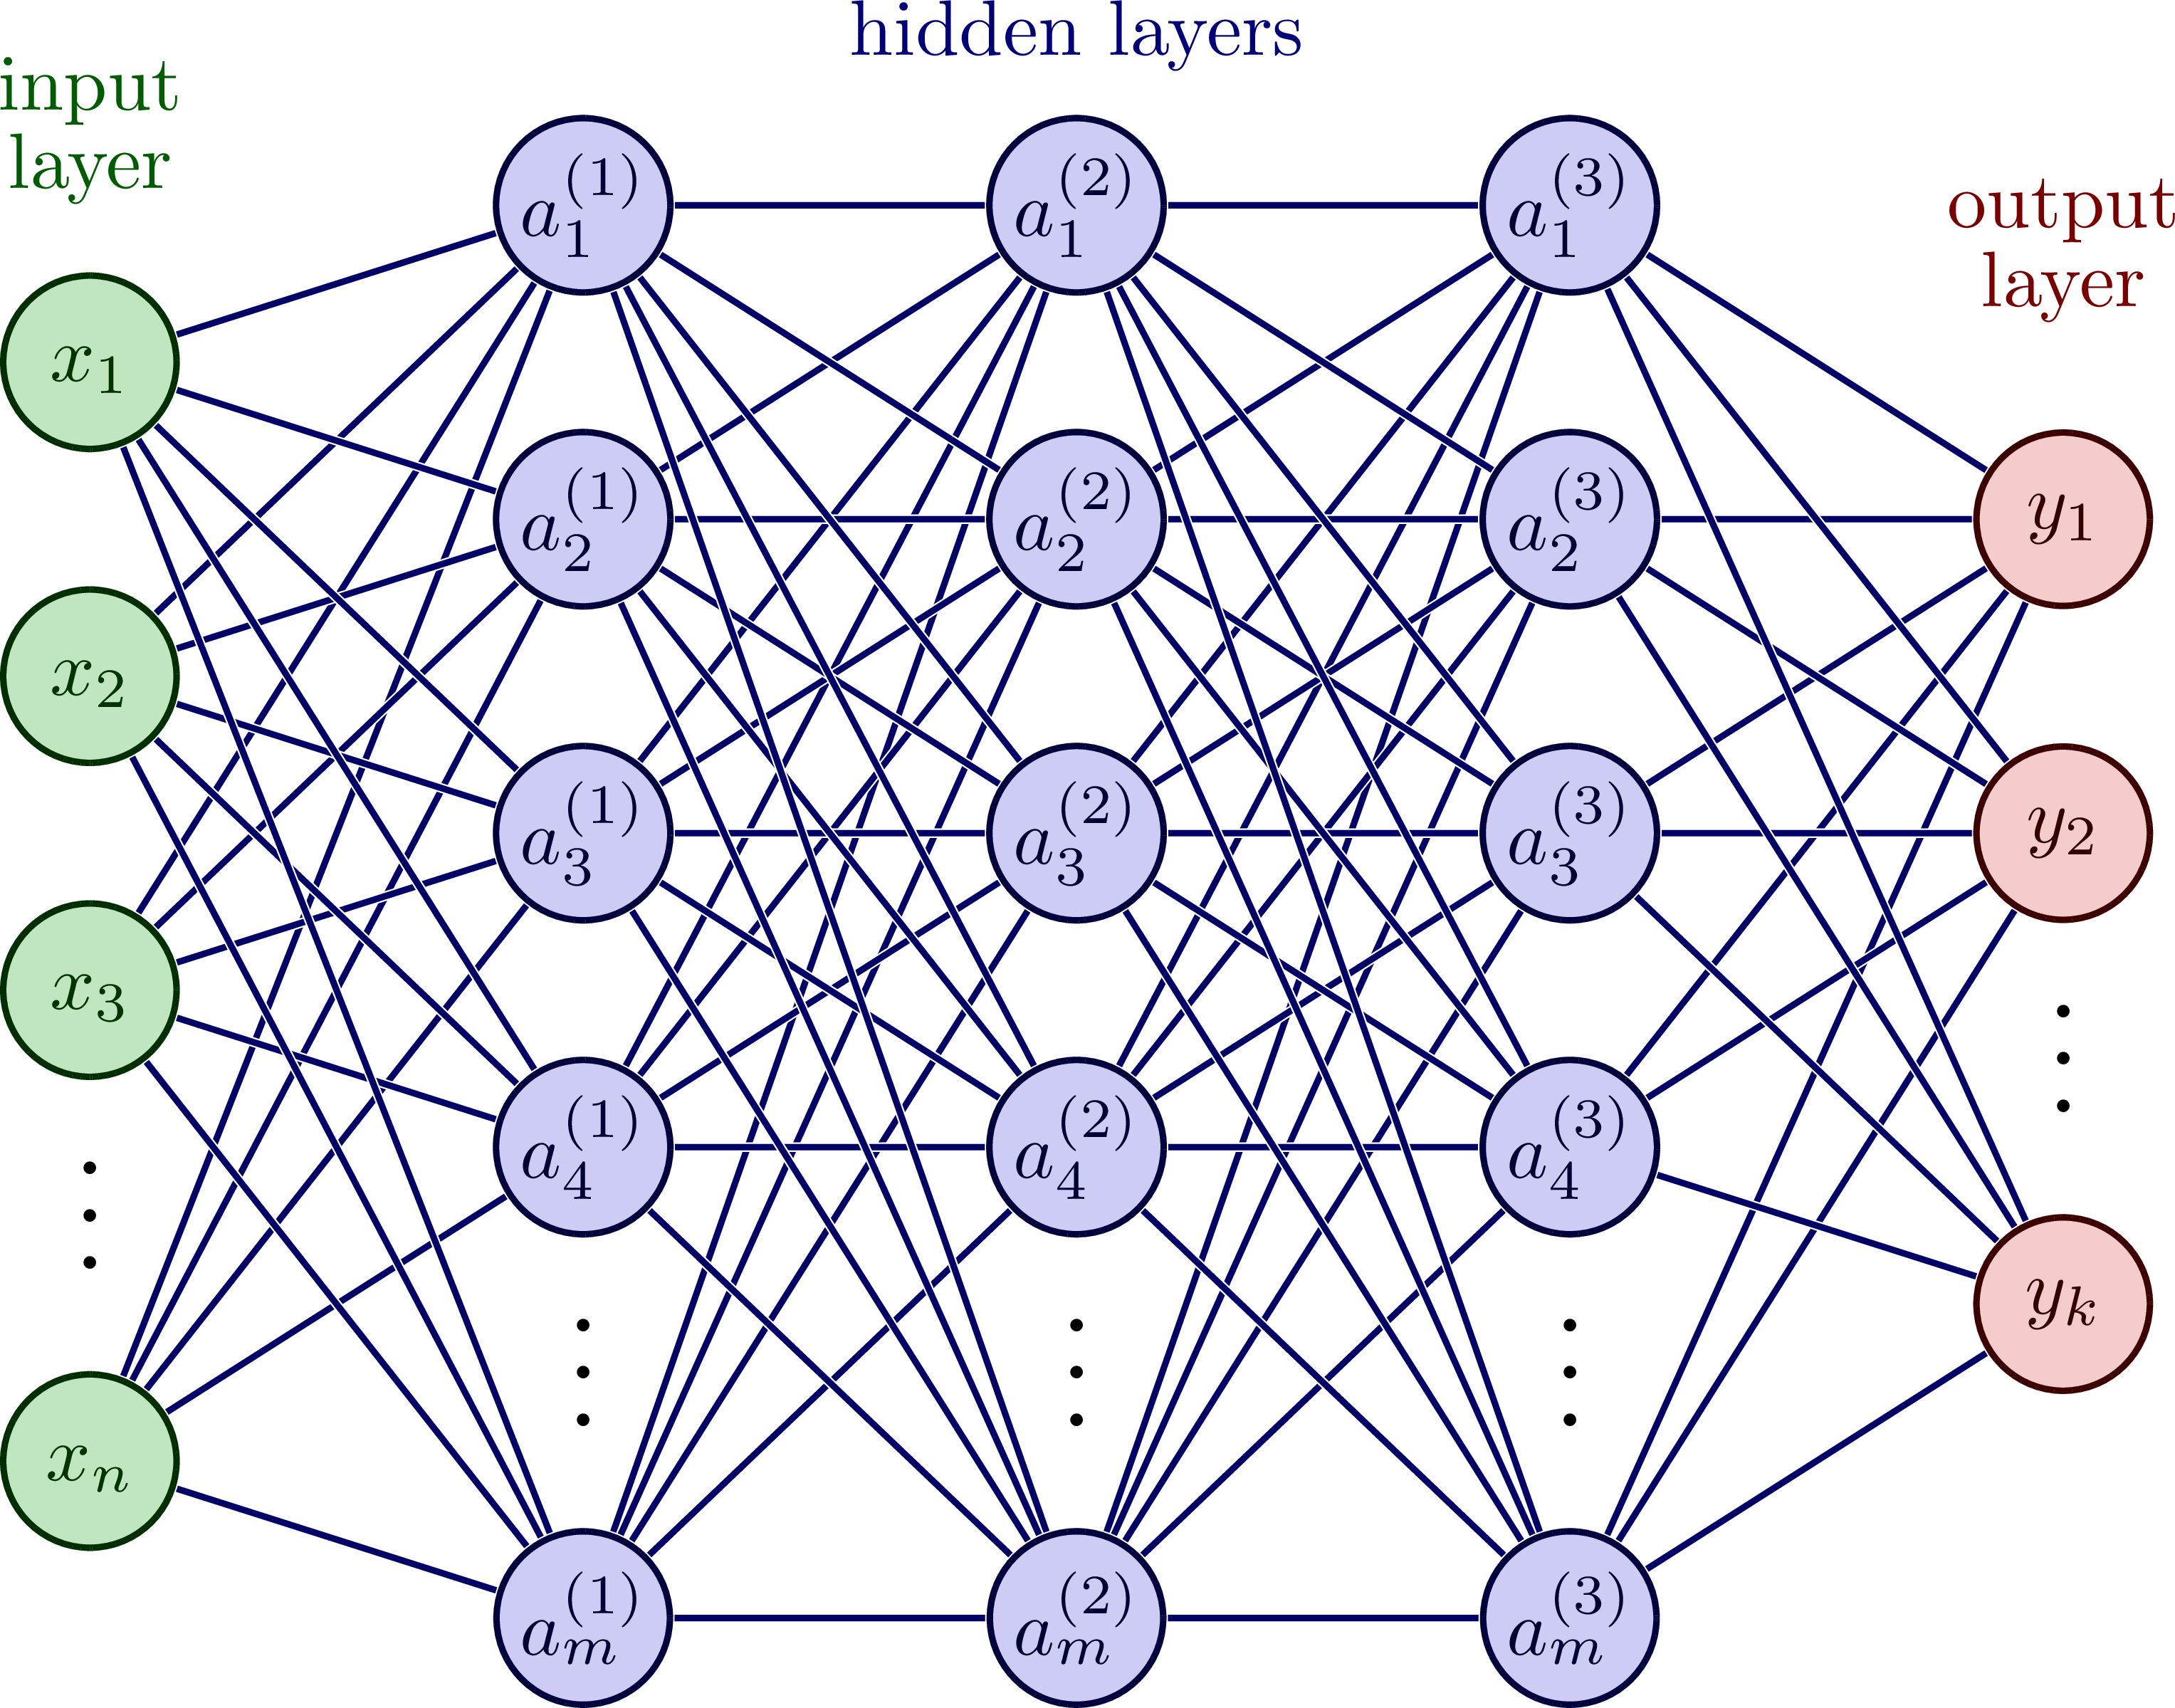

The notation is as follows:

- Data is separated into a matrix $\mathbf{X} = x_{i,j}$ of features and a vector of output values $\mathbf{y}=y_i$. $\mathbf{x}$ or $\mathbf{x}_i$ denotes one line of $\mathbf{X}$.
- A NN has $L \ge  1$ layers and for each layer $l$, the number of units is $U_i\ge 1$.
- Weights for unit $k$, located in layer $l$, are denoted $\mathbf{w}_k^{(l)} = w_{k,j}^{(l)}$ and the corresponding biases $b_k^{(l)}$. The length $\mathbf{x}_k^{(l)}$ is equal to $U_{l-1}$. $k$ refers to the location of the unit in layer $l$ while $j$ is the unit in layer $l-1$.
- Outputs (post-activation) are denoted $o_{i,k}^{(l)}$ for instance $i$, layer $l$ and unit $k$.

The process is as follows:

When entering the network the data goes through the initial linear mapping: 
$$
v_{i,k}^{(1)} = \mathbf{x}_i'\mathbf{w}_k^{(1)} + b_k^{(1)}, \quad \text{for } l = 1, \quad k \in [1, U_1] , 
$$
which is transformed by a non-linear function $f^{1}$. The results of this gives the input for the nxt layer (and so on). The linear transforms are repeated with different weights for each layer:
$$
v_{i,k}^{(l)} = (\mathbf{o}_i^{(l-1)})' \mathbf{w}_k^{(l)} + b_k^{(l)}, \quad \text{for } l \ge 2, \quad k \in [1, U_l].
$$

Connections between layers are called outputs, which are linear mappings to which the non-linear activation functions have been applied. The output of layer $l$ in the input of layer $l+1$
$$
o_{i,k}^{(l)} = f^{(l)} \left( v_{i,k}^{(l)} \right). 
$$ 

The terminal stage aggregates the outputs from the last layer
$$
\tilde{y}_i = f^{(L+1)} = \left( (\mathbf{o}_i^{(L)})' \mathbf{w}^{(L+1)} + b^{L+1}   \right)
$$

There are a lot of activation function we can choose from. Some examples are: Heaviside, identity, ReLu, Sigmoid, TanH.

#### <span style='color:#547dcd'> The process in factor investing  </span> 

$\mathbf{x}$ are characteristics of the firms. The first step multiplies there value and adds a bias. This is done in all units of the first layer. The output, a linear combination, is then transformed by the non-linear activation function. Each unit provides one value, which is then used in second layer (and so fourth).

The goal of the last layer is to yield an output shape corresponding to the label: a single number in case of numerical labels, and a vector of probabilities in case of categorical label.

It is possible to use a final activation function after the output: this can have a huge impact on the result (e.g., if the end goal is returns using a sigmoid will transform all returns into positive values).

### <span style='color:#547dcd'> Universal approximation  </span> 

Neural networks are *universal approximators*. Given a bounded continuous function, there exists a one-layer network that can approximate this function up to arbitrary precision.

Formally, a one-layer perceptron is
$$
f_n(\mathbf{x}) = \sum_{l=1}^{n} c_l\phi(\mathbf{x}\mathbf{w}_l + \mathbf{b}_l) + c_0
$$
where $\phi$ is a (non-constant) bounded continuous function. For any $\epsilon > 0$, it is possible to find one $n$ such that any continuous function $f$ on the unit hypercube $[0,1]^{d}$,
$$
 \left\| f(\mathbf{x}) - f_n(\mathbf{x}) \right\| < 0, \quad \forall \mathbf{x} \in [0,1]^{d}
$$

The results is: **it suffices to add units to the layer to improve the fit**. This is analogous to the polynomial approximation (there are differences like boundedness, smoothness, convexity, etc.). The universal approximation implies that any well-behaved function $f$ can be approached sufficiently closely by a simple neural network (if we allow the number of units to be arbitrarily large).

This does not relate directly to the learning phase (when a model is optimized with respect to a particular dataset). **Barron 1993** gives a more precise characterization of what NN's can achieve. He finds that the universal approximation (for a particular network with sigmoid activation), $\mathbb{E}[(f(\mathbf{x}) - f_n(\mathbf{x}))^{2}] \le c_f/n$, which gives a speed of convergence related to the size of the network. The random term in this is $\mathbf{x}$, which is assumed to be a sample.

In the sequel, $f_n$ corresponds to a possibly penalized NN with one intermediate layer with $n$ units and sigmoid activation. The supports and predictors and the label are assumed to be bounded. 

In regression MSE is very important, and this results provides a bound for this quantity. For $N$ randomly sampled iid points $y_i = f(x_i) + \epsilon_i$ on which $f_n$ is trained, the best possible empirical MSE behaves like
$$
\mathbb{E}[(f(x) - f_n(x))^{2}] = O \left( \frac{c_f}{n} \right) + O\left( \frac{n K \log(N)}{N} \right)
$$

where the first term is the size of the network and the second is the size of the sample. $K$ is the dimension of the input and $c_f$ is the constant that depends on the generator function $f$.

The results can nicely be summarized: having a complex model is useless if the sample is small just like a simple NN will not catch the fine relationships in a large dataset.

IN NNs, we can increase the fit in training data by increasing the number of units to the layer(s). This is a bad idea to do because high-dimensional networks will mostly capture particularities of the sample the are trained on, and will not generalize well.

### <span style='color:#547dcd'> Learning via back-propagation  </span> 

NNS are trained by minimizing a loss function subject to some penalization:
$$
O = \sum_{i=1}^{I} \text{loss}(y_i, \tilde{y}_i) + \text{penalization}
$$
where $\tilde{y}_i$ are the values obtained by the model, and $y_i$ are the true values/labels of the instances.

We can ease computation by having loss-function be differentiable. The most common loss functions are the squared error for regression and cross-entropy for classification.

In training we alter the weights (and biases) of all units in all layers so $O$ is the smallest possible. To ease notation we define $D(\tilde{y}_i(\mathbf{W})) = \text{loss}(y_i,\tilde{y}_i)$ where $\mathbf{W}$ is all the weights in biases in the network.

Weighs are updated via **gradient descent**
\begin{equation}
    \mathbf{W} \leftarrow \mathbf{W} - \eta \frac{\partial D(\tilde{y}_i)}{\partial \mathbf{W}}
\end{equation}

Having a high learning rate $\eta$ at times means that the descent will oscillate around the optimal point, whereas small $\eta$ wil converge more directly.

The problem with the equation above is that we need to calculate the gradient (best direction of descent). The issue is the many nested layers, which means we need to use the chain rule a lot.

The most common way to approximate a derivative is likely the **finite difference methods**. Under the usual assumptions (the loss is $C^{2}$) the centered difference satisfies
$$
\frac{\partial D(\tilde{y}_i(w_k))}{\partial w_k} = \frac{D(\tilde{y}_i(w_k + h)) - D(\tilde{y}_i(w_k - h))}{2h} + O(h^{2})
$$
where $h>0$ is some arbitrarily small number (this is a costly computation). 

To speed up computation we follow the chian rule and recycle the terms along the way. Recall
$$
\tilde{y}_i = f^{(L+1)} \left( (\mathbf{o}_i^{(L)})' \mathbf{w}^{(L+1)} + b ^{(L+1)} \right)  = f^{(L + 1)} \left( b ^{(L+1)} + \sum_{k=1}^{U_L} w_k^{(L+1)} o_{i,k}^{(L)} \right) ,
$$
We want to differentiate with respect the most immediate weight and biases. Recall that if $F = f \circ g \circ h$, when $F'(x) = (f' \circ g \circ h) \cdot (g' \circ h) \cdot h'$. We have that $D(\tilde{y}_i(f(w, b, o)))$ (note that popper footnote and superscripts are ignored here for notational ease). We then have that

\begin{align*}
    \frac{\partial D(\tilde{y}_i)}{\partial w_k^{(L+1)}} & = D'(\tilde{y}_i) \left( f^{(L+1)} \right) ' \left( b ^{(L+1)} + \sum_{k=1}^{U_L} w_k^{(L+1)} o_{i,k}^{(L)} \right) o_{i,k}^{(L)} \\
    & = D'(\tilde{y}_i) \left( f^{(L+1)} \right) ' \left( v_{i,k}^{(L+1)} \right)  o_{i,k}^{(L)} \\
    \frac{\partial D(\tilde{y}_i)}{\partial b ^{(L+1)}}
    & = D'(\tilde{y}_i) \left( f^{(L+1)} \right) ' \left( b ^{(L+1)} + \sum_{k=1}^{U_L} w_k^{(L+1)} o_{i,k}^{(L)} \right) 
\end{align*}

We must now go back one layer and this is done via the chain rule. To access layer $L$, recall $v_{i,k}^{(L)} = (\mathbf{o}_i^{(L-1)})' \mathbf{w}_k^{(L)} + b_k^{(L)} = b_k^{(L)} + \sum_{j=1}^{U_L} o_{i,j}^{(L-1)} w_{k,j}^{(L)}$, where $v_{i,k}$ is the output before applying the non-linear activation function. Then we have
\begin{align*}
    \frac{\partial D(\tilde{y}_i)}{\partial w_{k,j}^{(L)}} & = \frac{\partial D(\tilde{y}_i)}{\partial v_{i,k}^{(L)}} \frac{\partial v_{i,k}^{(L)}}{\partial w_{k,j}^{(L)}} = \frac{\partial D(\tilde{y}_i)}{\partial v_{i,k}^{(L)}} o_{i,j}^{(L-1)} \\
    & = \frac{\partial D(\tilde{y}_i)}{\partial o_{i,k}^{(L)}} \frac{\partial o^{(L)}_{i,k}}{\partial v_{i,k}^{(L)}} o_{i,j}^{(L-1)} = \frac{\partial D(\tilde{y}_i)}{\partial o_{i,k}^{(L)}} \left( f^{(L)} \right) ' \left( v_{i,k}^{(L)} \right)  o_{i,j}^{(L-1)} \\
    & = \underbrace{D'(\tilde{y}_i) \left( f^{(L+1)} \right) ' \left( v_{i,k}^{(L+1)} \right)}_{\text{computed above}}  w_k^{(L+1)} \left( f^{(L)} \right) ' \left( v_{i,k}^{(L)} \right) o_{i,j}^{(L-1)}
\end{align*}

We can recycle the number computed above.

The computations above hold true for every step of the differentiation. When computing the gradient for weights and basis in layer $l$, there will be two parts: one can be recycled from the previous layer and another, local part, depends only on the values and activation function of the current layer.

When the data is formatted using tensors, it is possible to resort to vectorization so that the number of calls is limited to an order of the magnitude of the number of nodes (units) in the network.

Back propagation is as follows: 
1. the data flows from the left trough the network;
2. the error/loss-function is computed;
3. all derivatives of this function (w.r.t weights and biases) are computed starting from the last layer and diffusing to the left.
4. all weight and biases can be updated to tke the sample points into account (the model is adjusted to reduce the loss/error stemming from these points).

#### <span style='color:#547dcd'> Learning parameter  </span> 

$\eta$ can be redefined. One way of reduce overfitting is to impose that after each epoch, the intensity of the update decreases. One possible parametric form is $\eta = \alpha e^{-\beta t}$, where $t$ is the epoch and $\alpha, \beta > 0$. One further sophistication is *momentum*:
\begin{gather*}
    \mathbf{W}_{t+1} \leftarrow \mathbf{W}_t - \mathbf{m}_t \quad \text{with} \\
    \mathbf{m}_t \leftarrow \eta \frac{\partial D(\tilde{y}_i)}{\partial \mathbf{W}} + \gamma \mathbf{m}_{t-1}
\end{gather*}
where $t$ is the index of the weight update. The idea is to speed up convergence by including a memory term of the last adjustment $\mathbf{m}_{t-1}$ and going in the same direction in the current update (the parameter $\gamma$ is often taken to be $0.9$). *There are more complex ways of going about this (see book for references).*

Gradients may explode and push weights far from their optimal values. To avoid this we can implement **gradient chipping** and specify a maximum magnitude for gradients. When a gradient surpasses this magnitude it is rescaled. Thus, the direction remains that same, but the adjustment is smaller.

### <span style='color:#547dcd'> Further details on classification  </span> 

The goal is to minimize the error between $\tilde{\mathbf{y}}_i$ and $\mathbf{y}_i$. $\mathbf{y}_i$ is a vector full of zeros with one denoting the class of the instance.

When working with classification we use an appropriate activation function at the end of the network. The dimension of the terminated output should be equal to $J$ (the number of classes), and if we use $\mathbf{x}_i$ for the values of this output the most commonly used activation is the *softmax* function
$$
\tilde{\mathbf{y}}_i = s(\mathbf{x})_i = \frac{e^{x_i}}{\sum_{j=1}^{J} e^{x_j}}
$$
It can take any values as input and it sums that one over any output. This yields a probability vector over the classes. Often the chosen loss is a generalization of the entropy used for trees. Given the target label $\mathbf{y}_i = (y_{i,1}, \ldots, y_{i,L}) = (0,0, \ldots ,0,1,0, \ldots ,.)$ and the predicted output $\tilde{\mathbf{y}}_i = (\tilde{y}_{i,1}, \ldots , \tilde{y}_{i,L})$ the **cross-entropy** is defined as
$$
\mathrm{CE}(\mathbf{y}_i, \tilde{\mathbf{y}}_i) = - \sum_{j=1}^{J} \log(\tilde{y}_{i,j}) y_{i,j}
$$
For the nonzero label the loss is $-\log(\tilde{y}_{i,1})$, while the others are zero. The best case is if $\tilde{y}_{i,l} = 1$, which is what we seek. 

## <span style='color:#547dcd'> How deep we should go and other practical issues  </span> 

### <span style='color:#547dcd'> Architectural choices  </span> 

Beyond feed-forward versus recurrent, the question is how big the networks should be. The number of parameters that are estimated in a network are: 
- for the first layer this gives $(U_0 + 1) U_1$ parameters, where $U_0$ is the number of columns in $\mathbb{X}$ and $U_1$ is the number of units in the layer.
- For layer $l \in [2,L]$ the number of parameters is $(U_{l-1} + 1) U_l$.
- For the final layer there are $U_{L} + 1$ parameters.
- This means, that in total the number of values to optimize is
$$
\mathcal{N} = \left( \sum_{l=1}^{L} (U_{l-1} + 1) U_l \right) + U_L + 1
$$


The number of parameters should be (much) smaller than the number of instances. A rule of thumb: sample size is at least 10 times larger than number of parameters. 

The number of hidden layers in current applications rarely exceed three our four. The number of units per layer $U_k$, is often chosen to follow the geometric pyramid rule. IF there are $L$ hidden layers, with $I$ features in the input and $O$ dimensions in the output, then for the $k$'th layer, a rule of thumb for the number of units is
$$
U_k \approx \left\lfloor O\left( \frac{I}{O} \right)^{\frac{L+1-k}{L+1}}   \right\rfloor
$$
In case of one intermediate layer the proxy is the integer part of $\sqrt{IO}$. 

**Several studies have shown that very large architectures do not always perform better than more shallow ones (e.g., Gu, Kelly, and Xiu (2020b) and Orimoloye et al. (2019) for high frequency data, i.e., not factor-based). As a rule of thumb, a maximum of three hidden layers seem to be sufficient for prediction purposes.**

### <span style='color:#547dcd'> Frequency of weight updates and learning duration  </span> 

Previously, it was implicitly given that each weight update was done on each instance. This is computationally too expensive if samples are very large.

Each update is therefore performed on a group of instances called batches. The sample is randomly split into batches of fized sizes and each update is performed according to the following rule
$$
\mathbf{W} \leftarrow \mathbf{W} - \eta \frac{\partial \sum_{i \in \text{batch}} D(\tilde{y}_i) / \text{card}(\text{batch})}{\partial \mathbf{W}}
$$

The change in weights in computed over the average loss computed over all instances in the batch. 

Relevant terminology:
- 